In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
#df = pd.read_csv('filename')
from google.colab import files


In [0]:
uploaded = files.upload()

Saving diabetes_null.csv to diabetes_null (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes_null.csv']))

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


## Exploratory Data Analysis

In [0]:
df.shape

(768, 9)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,99.310616,55.706685,25.876155,105.659898,29.865654,0.490439,30.990885,0.348958
std,3.369578,55.115381,29.878852,12.967816,116.862508,10.686049,0.346050,13.281475,0.476951
min,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.100000,3.000000,0.000000
25%,1.000000,72.500000,16.000000,18.000000,21.000000,25.400000,0.253750,23.000000,0.000000
50%,3.000000,113.000000,66.000000,27.000000,71.000000,32.000000,0.382500,28.000000,0.000000
75%,6.000000,138.000000,76.000000,35.000000,151.000000,36.100000,0.647500,38.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

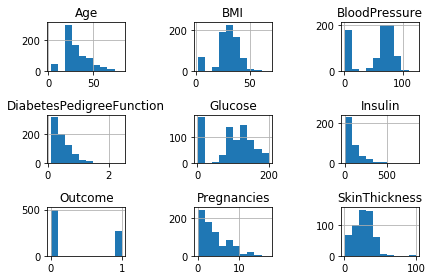

In [0]:
df.hist()
plt.tight_layout()

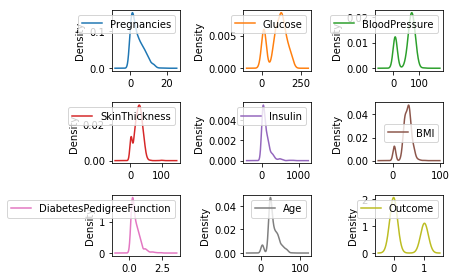

In [0]:
df.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(3,3))
plt.tight_layout()

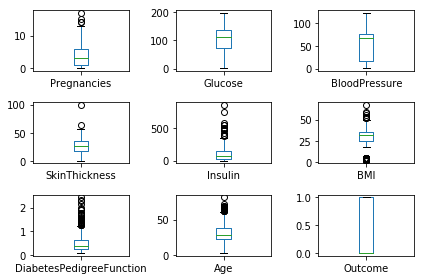

In [0]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3))
plt.tight_layout()

In [0]:
df.skew()

Pregnancies                 0.901674
Glucose                    -0.406711
BloodPressure              -0.781913
SkinThickness               0.122001
Insulin                     2.349056
BMI                        -0.902859
DiabetesPedigreeFunction    1.947727
Age                         0.522223
Outcome                     0.635017
dtype: float64

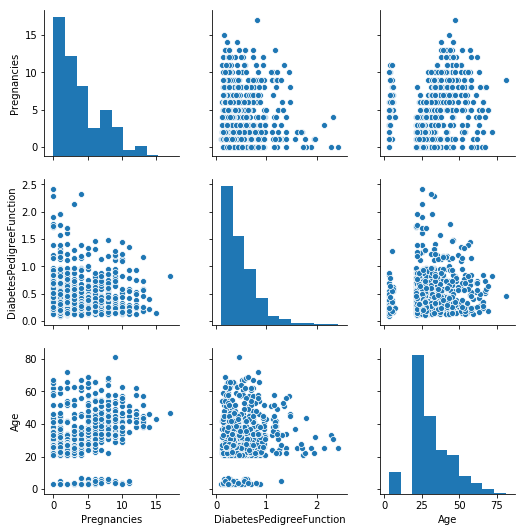

In [0]:
sns.pairplot(df[['Pregnancies','DiabetesPedigreeFunction','Age']])

In [0]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.071566,0.075564,0.061992,0.051058,-0.010713,-0.049491,0.405498,0.221898
Glucose,0.071566,1.000000,0.006670,0.171781,0.293247,0.075092,0.043208,0.074758,0.309258
BloodPressure,0.075564,0.006670,1.000000,-0.009324,-0.052187,-0.017583,0.016380,0.058947,0.024426
SkinThickness,0.061992,0.171781,-0.009324,1.000000,0.122596,0.241362,0.118092,0.091434,0.249287
Insulin,0.051058,0.293247,-0.052187,0.122596,1.000000,-0.067501,0.166252,0.046092,0.208778
BMI,-0.010713,0.075092,-0.017583,0.241362,-0.067501,1.000000,0.042787,0.024115,0.186026
DiabetesPedigreeFunction,-0.049491,0.043208,0.016380,0.118092,0.166252,0.042787,1.000000,0.065132,0.151608
Age,0.405498,0.074758,0.058947,0.091434,0.046092,0.024115,0.065132,1.000000,0.175860
Outcome,0.221898,0.309258,0.024426,0.249287,0.208778,0.186026,0.151608,0.175860,1.000000


In [0]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [0]:
df['Glucose'].median()

113.0

## Filling up Missing Values

In [0]:
df['Glucose'].fillna(value=df['Glucose'].median(),inplace=True)

In [0]:
df['BloodPressure'].fillna(value=df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(value=df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(value=df['Insulin'].median(),inplace=True)
df['BMI'].fillna(value=df['BMI'].median(),inplace=True)

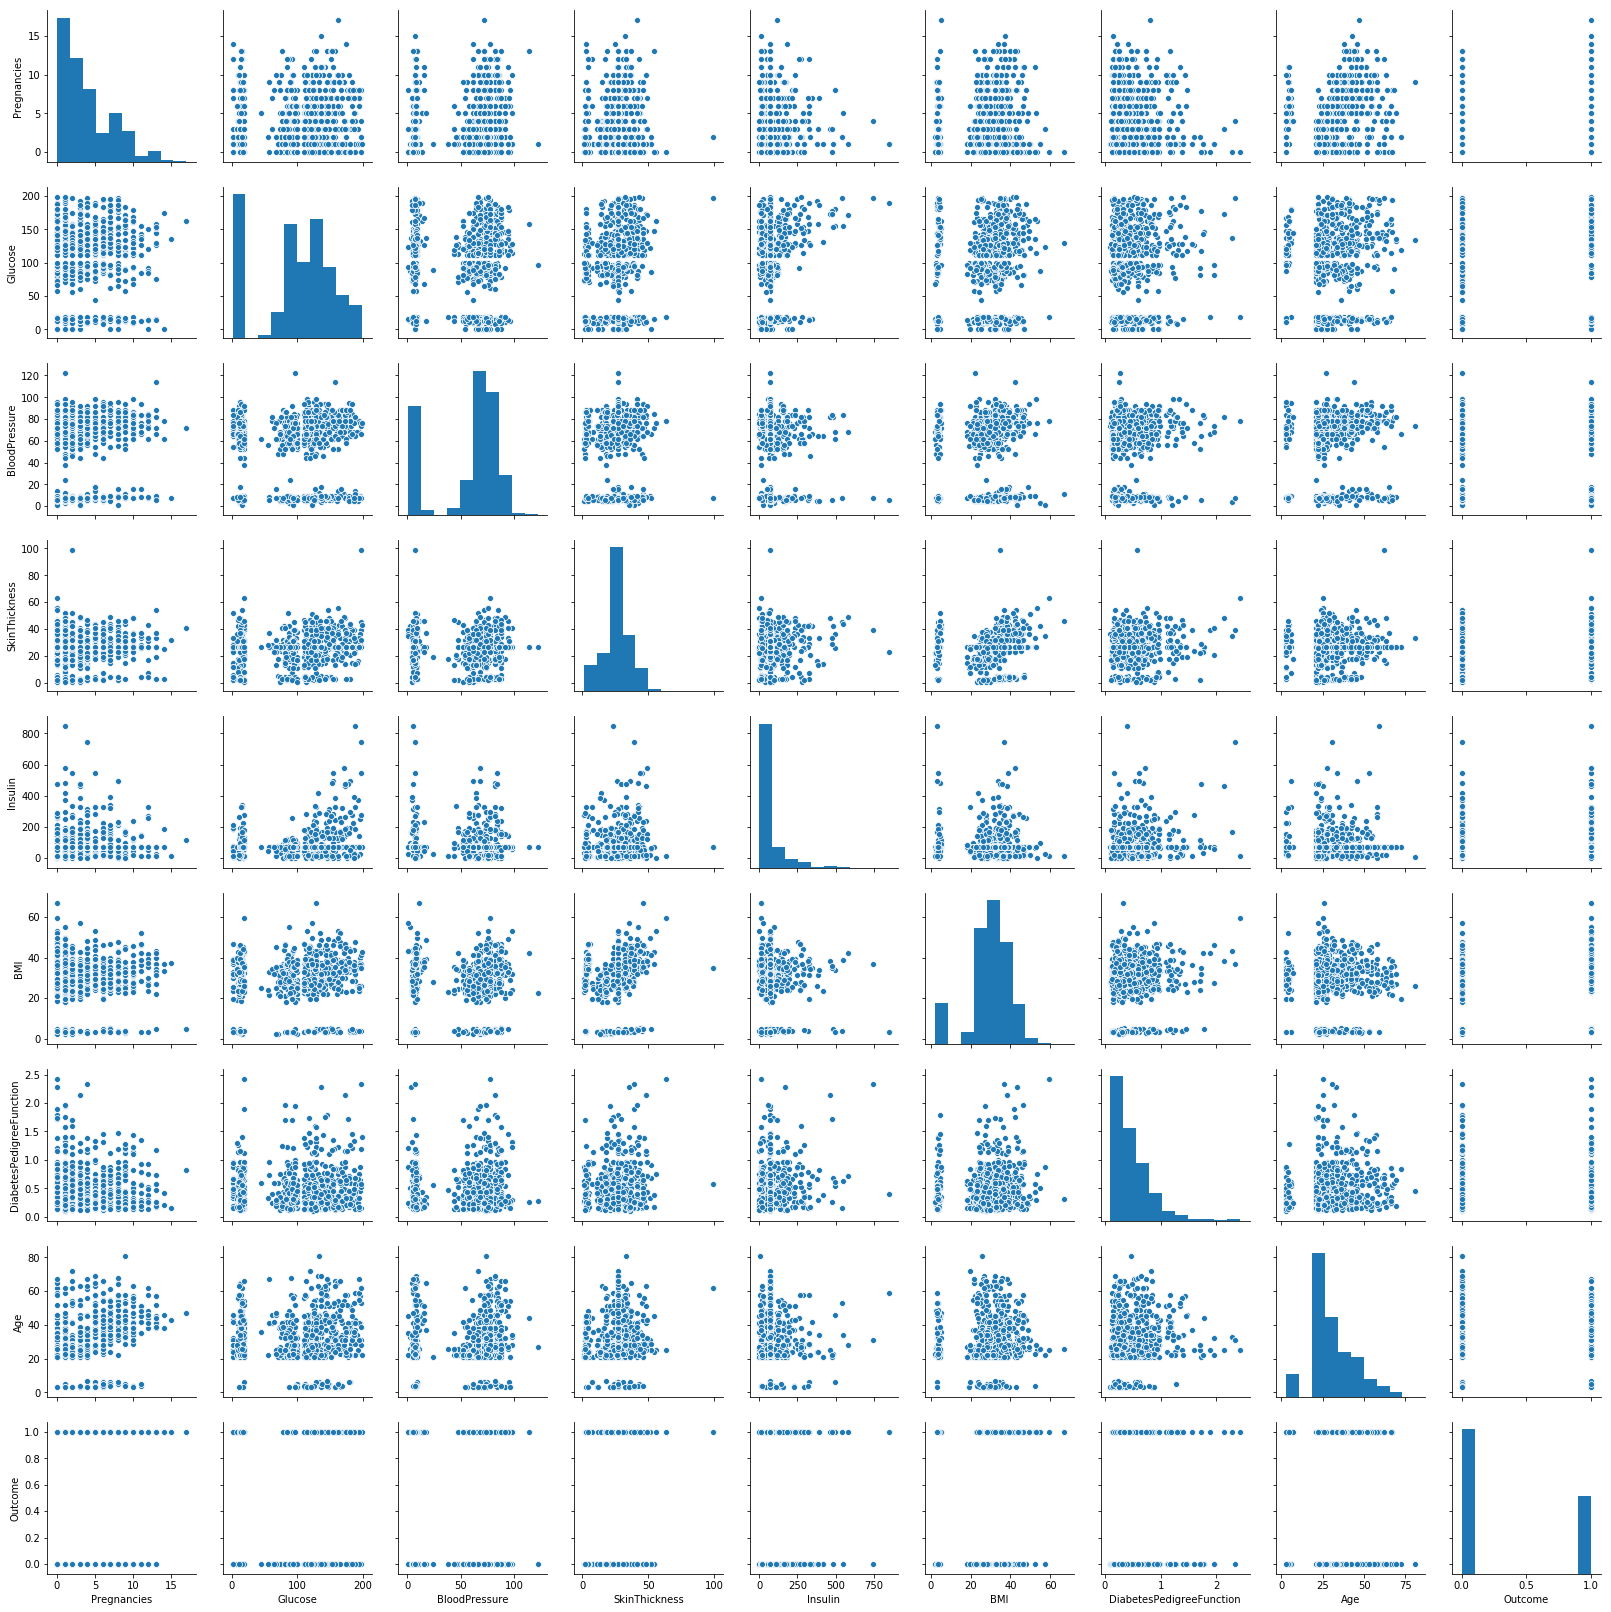

In [0]:
sns.pairplot(df)

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,71.0,33.6,0.627,5,1
1,1,85.0,66.0,29.0,71.0,26.6,0.351,31,0
2,8,183.0,64.0,27.0,71.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [0]:
df['DiabetesPedigreeFunction'].max()

2.42

In [0]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [0]:
X = df.drop('Outcome',axis=1)
y=df['Outcome']

## Scaling the values using either standard normal scalar or Normalizer or minmaxscalar

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc_x = StandardScaler()
sc_nor = Normalizer()
sc_minmax=MinMaxScaler()

In [0]:
sc_x.fit_transform(X)

array([[ 6.39947260e-01,  8.85078102e-01,  5.41016524e-01, ...,
         3.49239256e-01,  3.94885727e-01, -1.95820296e+00],
       [-8.44885053e-01, -2.62239216e-01,  3.35881648e-01, ...,
        -3.10810046e-01, -4.03206721e-01,  6.86710122e-04],
       [ 1.23388019e+00,  1.52247661e+00,  2.67503356e-01, ...,
        -6.21976146e-01,  5.25009496e-01,  7.60286207e-02],
       ...,
       [ 3.42980797e-01,  3.93370680e-01,  5.41016524e-01, ...,
        -3.48527149e-01, -7.09720487e-01, -2.10888679e+00],
       [-8.44885053e-01,  4.84427610e-01, -1.71546711e+00, ...,
        -2.52668985e+00, -4.08989999e-01,  1.20615728e+00],
       [-8.44885053e-01, -1.16548128e-01, -1.68127796e+00, ...,
        -2.49840202e+00, -5.07305736e-01, -6.02048574e-01]])

In [0]:
sc_nor.fit_transform(X)

array([[0.03228217, 0.79629352, 0.38738604, ..., 0.18078015, 0.00337349,
        0.02690181],
       [0.00722956, 0.61451287, 0.47715117, ..., 0.19230638, 0.00253758,
        0.22411646],
       [0.03771809, 0.86280122, 0.30174469, ..., 0.10985393, 0.00316832,
        0.15087234],
       ...,
       [0.02726973, 0.65992747, 0.39268411, ..., 0.14289339, 0.00133622,
        0.01636184],
       [0.00646823, 0.81499672, 0.03880937, ..., 0.02005151, 0.00225741,
        0.30400671],
       [0.00809998, 0.75329802, 0.05669985, ..., 0.02753993, 0.00255149,
        0.18629951]])

In [0]:
X= sc_minmax.fit_transform(X)

In [0]:
from sklearn.externals import joblib

In [0]:
joblib.dump(sc_x,'scaled.pkl')

['scaled.pkl']

In [0]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,0.352941,0.742424,0.586777,0.346939,0.082840,0.485407,0.227155,0.025641
1,0.058824,0.424242,0.537190,0.285714,0.082840,0.377880,0.108190,0.358974
2,0.470588,0.919192,0.520661,0.265306,0.082840,0.327189,0.246552,0.371795
3,0.058824,0.444444,0.537190,0.224490,0.110059,0.400922,0.028879,0.230769
4,0.000000,0.686869,0.024793,0.346939,0.197633,0.631336,0.943103,0.384615
5,0.294118,0.580808,0.603306,0.265306,0.082840,0.362519,0.047414,0.000000
6,0.176471,0.388889,0.033058,0.316327,0.102959,0.445469,0.063793,0.294872
7,0.588235,0.575758,0.537190,0.265306,0.082840,0.511521,0.014655,0.333333
8,0.117647,0.989899,0.049587,0.448980,0.641420,0.023041,0.025000,0.641026
9,0.470588,0.626263,0.785124,0.265306,0.082840,0.460829,0.056897,0.653846
